In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [35]:
df = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [37]:
df = df['Open'].values
df = df.reshape(-1, 1)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [38]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])


array([[ 0.12834799],
       [ 0.12221   ],
       [ 0.113281  ],
       ...,
       [14.55000019],
       [14.48928642],
       [14.42500019]])

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [27]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [28]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [39]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


array([[[0.56754409],
        [0.55628904],
        [0.57245123],
        ...,
        [0.71063569],
        [0.71161998],
        [0.70903806]],

       [[0.55628904],
        [0.57245123],
        [0.58282183],
        ...,
        [0.71161998],
        [0.70903806],
        [0.71839577]],

       [[0.57245123],
        [0.58282183],
        [0.59837059],
        ...,
        [0.70903806],
        [0.71839577],
        [0.7201076 ]],

       ...,

       [[5.03747755],
        [5.05465255],
        [5.07901709],
        ...,
        [5.83711326],
        [5.94815151],
        [5.9309762 ]],

       [[5.05465255],
        [5.07901709],
        [5.07142805],
        ...,
        [5.94815151],
        [5.9309762 ],
        [5.998478  ]],

       [[5.07901709],
        [5.07142805],
        [5.05185663],
        ...,
        [5.9309762 ],
        [5.998478  ],
        [5.98130331]]])

In [30]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [31]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
255/255 [==============================] - 45s 152ms/step - loss: 0.0015
Epoch 2/50
255/255 [==============================] - 45s 177ms/step - loss: 7.2197e-04
Epoch 3/50
255/255 [==============================] - 41s 161ms/step - loss: 4.4965e-04
Epoch 4/50
255/255 [==============================] - 42s 165ms/step - loss: 5.6649e-04
Epoch 5/50
255/255 [==============================] - 45s 177ms/step - loss: 4.5081e-04
Epoch 6/50
255/255 [==============================] - 41s 159ms/step - loss: 4.1335e-04
Epoch 7/50
255/255 [==============================] - 42s 163ms/step - loss: 4.6464e-04
Epoch 8/50
255/255 [==============================] - 43s 167ms/step - loss: 4.5574e-04
Epoch 9/50
255/255 [==============================] - 44s 171ms/step - loss: 3.6973e-04
Epoch 10/50
255/255 [==============================] - 41s 159ms/step - loss: 5.0631e-04
Epoch 11/50
255/255 [==============================] - 42s 165ms/step - loss: 3.2284e-04
Epoch 12/50
255/255 [=============

KeyboardInterrupt: 

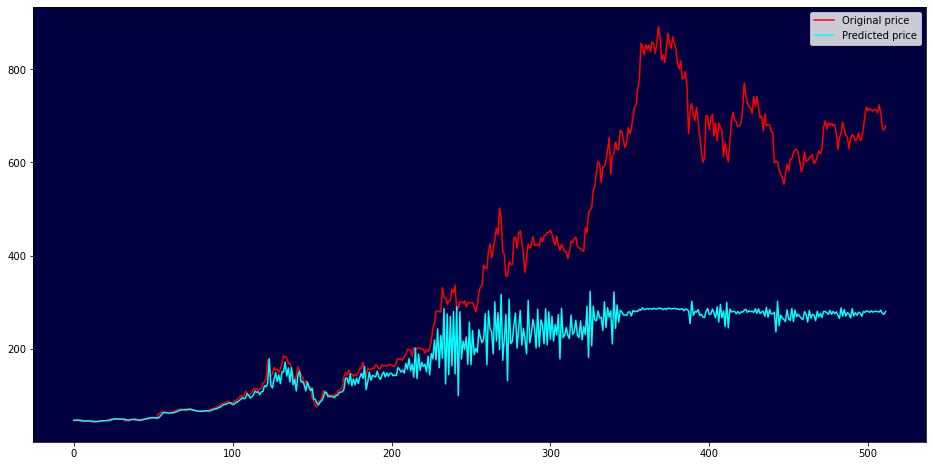

In [22]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [20]:
df

array([[  3.79999995],
       [  5.15799999],
       [  5.        ],
       ...,
       [672.65997314],
       [669.75      ],
       [678.21002197]])